# Evaluation on database

**Imports**

In [1]:
# Navigate to appropriate directory
import os
while os.path.split(os.getcwd())[1] != "patchmatch":
    os.chdir("..")
    if os.getcwd() == "/":
        raise ValueError()

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from time import time
from tqdm import tqdm
import cv2 as cv

import patchmatch as pm
import detection as dt

**Matplotlib display mode**

In [2]:
# Run this cell to display matplotlib plots in a separate window
# %matplotlib qt

In [3]:
# Run this cell to display matplotlib plots inside the jupyter notebook
# %matplotlib inline

## F measure values

In [4]:
RES_DIR_1 = "results/results1/"  # directory from where to load the results of PatchMatch applied on the database

F = []  # F measure values

for filename in tqdm(os.listdir(RES_DIR_1)):
    if filename[:2] == "TP":
        # Load result file
        a = np.load(RES_DIR_1 + filename)
        
        # Compute mask
        m, n, p = a["m"], a["n"], a["p"]
        mask, _ = dt.compute_mask(a["vect_field"], m, n, p)
        
        # Load ground truth
        title = filename[:10]
        gt = Image.open(f"data/CMFD_DB/{title}_gt.png")
        gt = np.array(gt) > 0
        
        # Compute F measure
        TP = mask * gt
        FP = mask * (gt < 1)
        FN = (mask < 1) * gt
        
        F.append(2 * np.sum(TP) / (2 * np.sum(TP) + np.sum(FN) + np.sum(FP)))

100%|█████████████████████████████████████████| 100/100 [00:42<00:00,  2.35it/s]


In [5]:
F = np.array(F)
print('mean accuracy = ', np.mean(F))
print('std accuracy = ', np.std(F))

mean accuracy =  0.8957160184291266
std accuracy =  0.10789914402973988


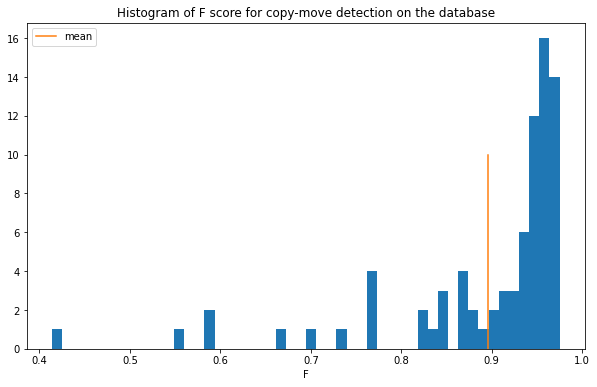

In [6]:
plt.figure(figsize=(10,6))
plt.title("Histogram of F score for copy-move detection on the database")
plt.xlabel("F")
plt.hist(F, bins=50)
plt.plot([np.mean(F), np.mean(F)], [0, 10], label="mean")
plt.legend()
plt.show()

## Number of propagations and sum of distances

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 932.61it/s]


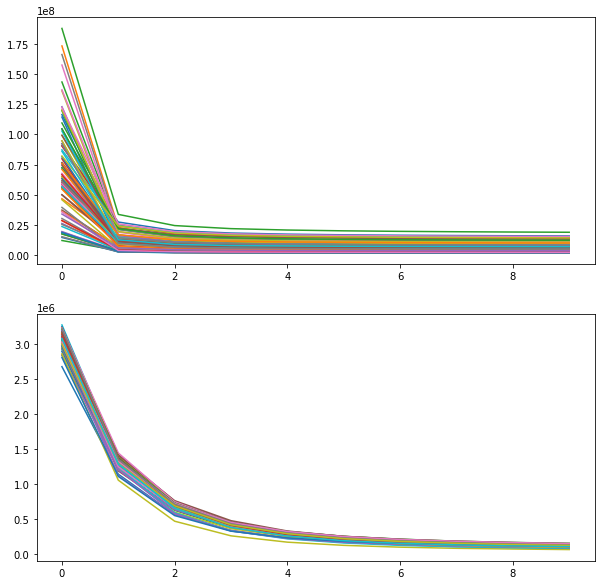

In [7]:
RES_DIR_3 = "results/results3/"

F = []

plt.figure(figsize=(10,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex=ax1)

for filename in tqdm(os.listdir(RES_DIR_3)):
    if filename[:2] == "TP":
        a = np.load(RES_DIR_3 + filename)
        ax1.plot(a["sum_of_distances"][:10])
        ax2.plot(a["n_propagations"][:10])

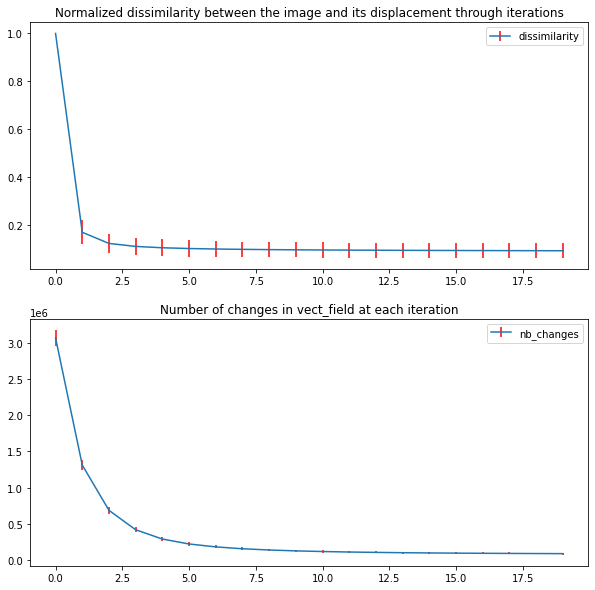

In [8]:
sum_of_distances = []
n_propagations = []

for filename in os.listdir(RES_DIR_3):
    if filename[:2] == "TP":
        a = np.load(RES_DIR_3 + filename)  # load result file
        n_iter = a["n_performed_iterations"].item()
        # Append values to sum_of_distances and n_propagations
        sum_of_distances.append(a["sum_of_distances"][:n_iter] / a["sum_of_distances"][0])
        n_propagations.append(a["n_propagations"][:n_iter])

# Initialize figure
plt.figure(figsize=(10,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex=ax1)
X = np.arange(n_iter)

# Plot sum of distances
sum_of_distances = np.array(sum_of_distances)
sum_of_distances_mean = np.mean(sum_of_distances, axis=0)
sum_of_distances_std = np.std(sum_of_distances, axis=0)
ax1.set_title("Normalized dissimilarity between the image and its displacement through iterations")
ax1.errorbar(X, sum_of_distances_mean, sum_of_distances_std, ecolor = "r", label="dissimilarity")
ax1.legend()

# Plot number of propagations
n_propagations = np.array(n_propagations)
n_propagations_mean = np.mean(n_propagations, axis=0)
n_propagations_std = np.std(n_propagations, axis=0)
ax2.set_title("Number of changes in vect_field at each iteration")
ax2.errorbar(X, n_propagations_mean, n_propagations_std, ecolor = "r", label="nb_changes")
ax2.legend()

plt.show()

In [9]:
#Test for similarity between the same detected object

# indice = np.where(mask>=0)
# I = indice[0]
# J = indice[1]
# m = A['m']
# n = A['n']
# indice_arrive = (np.array(indice) + vect_field[indice].T)
# mask_arrive = mask[(indice_arrive[0],indice_arrive[1])]
# plt.imshow(mask)
# plt.show()
# plt.imshow(mask_arrive.reshape((m,n)))
# plt.show()



# indice = np.where(mask==1)
# I = indice[0]
# J = indice[1]
# vect_field = A['vect_field']
# print('n = ',A['n'])
# print('m = ',A['m'])

# indice_arrive = (np.array(indice) + vect_field[indice].T)

# dist = np.sum((im2[indice]-im2[(indice_arrive[0],indice_arrive[1])])**2)
# plt.imshow((im2*mask[:,:,None]).astype("uint8"))
# plt.show()

# print(dist)